Epoch 1/10
548/548 [==============================] - 100s 179ms/step - loss: 0.2382 - accuracy: 0.9342 - val_loss: 0.1350 - val_accuracy: 0.9619
Epoch 2/10
548/548 [==============================] - 80s 146ms/step - loss: 0.1350 - accuracy: 0.9642 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 3/10
548/548 [==============================] - 87s 159ms/step - loss: 0.1061 - accuracy: 0.9708 - val_loss: 0.0810 - val_accuracy: 0.9758
Epoch 4/10
548/548 [==============================] - 64s 117ms/step - loss: 0.0909 - accuracy: 0.9747 - val_loss: 0.0711 - val_accuracy: 0.9789
Epoch 5/10
548/548 [==============================] - 69s 126ms/step - loss: 0.0791 - accuracy: 0.9770 - val_loss: 0.0620 - val_accuracy: 0.9821
Epoch 6/10
548/548 [==============================] - 83s 151ms/step - loss: 0.0701 - accuracy: 0.9802 - val_loss: 0.0639 - val_accuracy: 0.9811
Epoch 7/10
548/548 [==============================] - 77s 140ms/step - loss: 0.0650 - accuracy: 0.9807 - val_loss: 0.0600 - val_a

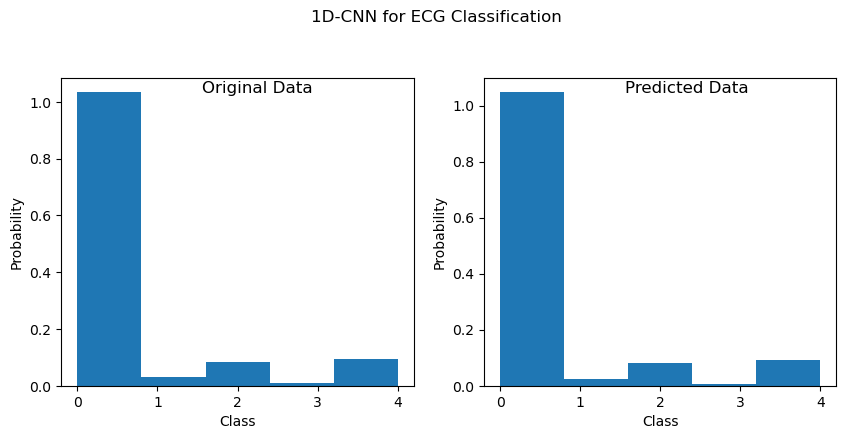

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential

# Load data
df_train = pd.read_csv('mitbih_train.csv')
df_test = pd.read_csv('mitbih_test.csv')

# Split data into features and target
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values

X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for 1D-CNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Split data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the 1D-CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate accuracy score and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Plot the results
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4))

ax0.hist(y_train, bins=5, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Class")
ax0.text(s="Original Data", x=0.4, y=0.95, fontsize=12, transform=ax0.transAxes)

ax1.hist(y_pred, bins=5, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Class")
ax1.text(s="Predicted Data", x=0.4, y=0.95, fontsize=12, transform=ax1.transAxes)

f.suptitle("1D-CNN for ECG Classification", y=1.05)

plt.show()
